<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_PPGMNE.png" width="700" alt="PPGOLD Data Science: INTRO"  />
</p>

# Data Science 2 - Aula 03

## Ridge e Lasso Regression

* Análise do valor do $\lambda$

<Axes: >

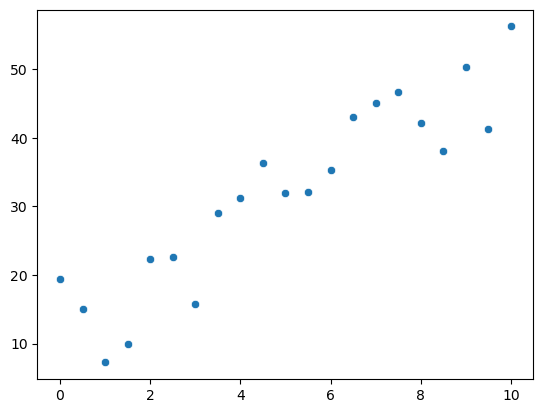

In [160]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

x = np.linspace(0, 10, num=21)
y = [19.40999903, 15.0969492 ,  7.25636891,  9.96442771, 22.37447056,
       22.6708095 , 15.76627942, 29.01084232, 31.25482193, 36.33744497,
       32.01093297, 32.05960194, 35.34019715, 42.98660161, 45.02103109,
       46.62624511, 42.14866857, 38.0423405 , 50.38540345, 41.33054399,
       56.21910974]
#y = 3 + 4*x +16.5234*np.random.rand(21)
sns.scatterplot(x=x,y=y)

## Ridge Regression

     coef_ang  variable       value
0        -4.0  lambda=0  251.598616
1        -3.9  lambda=0  248.941805
2        -3.8  lambda=0  246.285466
3        -3.7  lambda=0  243.629615
4        -3.6  lambda=0  240.974269
..        ...       ...         ...
995       5.5  lambda=9  304.494141
996       5.6  lambda=9  314.998102
997       5.7  lambda=9  325.889126
998       5.8  lambda=9  337.154193
999       5.9  lambda=9  348.778296

[1000 rows x 3 columns]


/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Lambda')

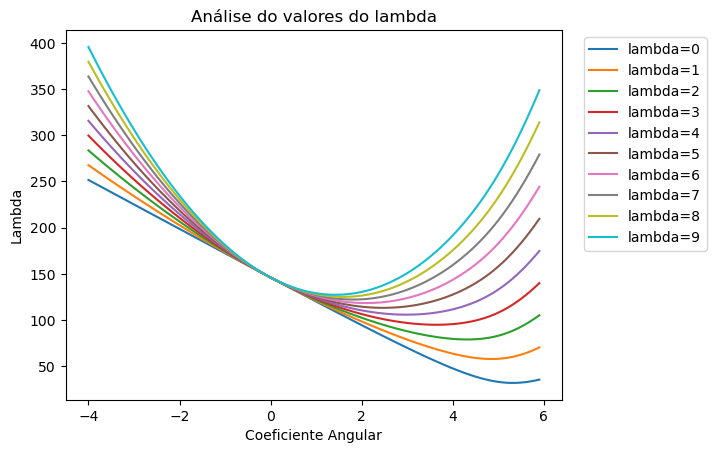

In [170]:
coef_linear = 3
ca = [-4+x * 0.1 for x in range(0, 100)]
df = pd.DataFrame(ca, columns = ["coef_ang"])

for l in range(0,10):
    lista = []
    for i in ca:
        coef_angular = i
        y_hat = coef_linear + x*coef_angular
        residuo = y_hat - y
        residuo2 = residuo**2
        m=1
        lambda_ridge = l*m
        ridge = np.sqrt(residuo2.sum()) + lambda_ridge*coef_angular**2
        lista.append(ridge)
    df = pd.concat([df,pd.DataFrame(lista)], axis = 1)
    df.rename(columns={df.columns[l+1]: "lambda="+str(m*l)}, inplace=True)

# Melt the DataFrame into one column
value_vars = df.drop(["coef_ang"], axis=1).columns
df = pd.melt(df, id_vars=["coef_ang"], value_vars=value_vars)

# Print the melted DataFrame
print(df)

#plot erros
sns.lineplot(data = df, x="coef_ang",y="value",hue="variable")
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.title("Análise do valores do lambda")
plt.xlabel("Coeficiente Angular")
plt.ylabel("Lambda")

## Lasso Regression

     coef_ang  variable       value
0        -4.0  lambda=0  251.598616
1        -3.9  lambda=0  248.941805
2        -3.8  lambda=0  246.285466
3        -3.7  lambda=0  243.629615
4        -3.6  lambda=0  240.974269
..        ...       ...         ...
995       5.5  lambda=9   81.744141
996       5.6  lambda=9   83.158102
997       5.7  lambda=9   84.779126
998       5.8  lambda=9   86.594193
999       5.9  lambda=9   88.588296

[1000 rows x 3 columns]


/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


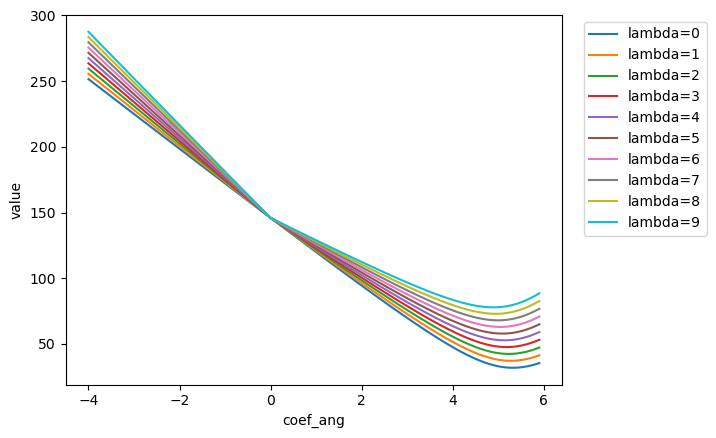

In [163]:
coef_linear = 3
ca = [-4+x * 0.1 for x in range(0, 100)]
df = pd.DataFrame(ca, columns = ["coef_ang"])

for l in range(0,10):
    lista = []
    for i in ca:
        coef_angular = i
        y_hat = coef_linear + x*coef_angular
        residuo = y_hat - y
        residuo2 = residuo**2
        m = 1
        lambda_ridge = l*m
        ridge = np.sqrt(residuo2.sum()) + lambda_ridge*np.abs(coef_angular)
        lista.append(ridge)
    df = pd.concat([df,pd.DataFrame(lista)], axis = 1)
    #df.columns[l] = ["lambda="+str(l)]
    df.rename(columns={df.columns[l+1]: "lambda="+str(m*l)}, inplace=True)

#print(df.head())

value_vars = df.drop(["coef_ang"], axis=1).columns
# Melt the DataFrame into one column
df = pd.melt(df, id_vars=["coef_ang"], value_vars=value_vars)

# Print the melted DataFrame
print(df)
sns.lineplot(data = df, x="coef_ang",y="value",hue="variable")
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')

     coef_ang   variable       value
0        -4.0   lambda=0  251.598616
1        -3.9   lambda=0  248.941805
2        -3.8   lambda=0  246.285466
3        -3.7   lambda=0  243.629615
4        -3.6   lambda=0  240.974269
..        ...        ...         ...
995       5.5  lambda=45  279.744141
996       5.6  lambda=45  284.758102
997       5.7  lambda=45  289.979126
998       5.8  lambda=45  295.394193
999       5.9  lambda=45  300.988296

[1000 rows x 3 columns]


/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/ppgold/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


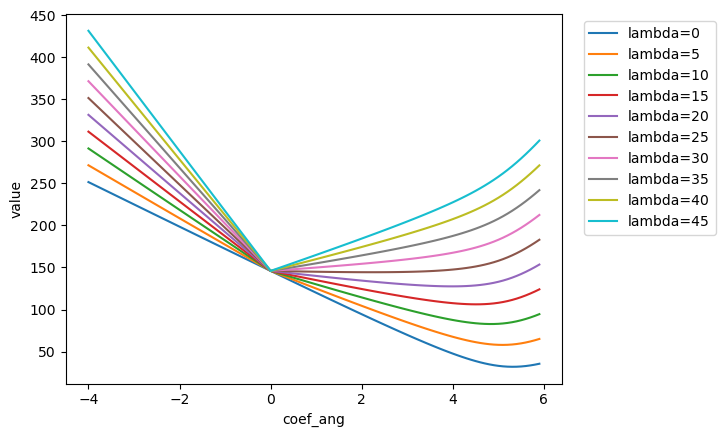

In [165]:
coef_linear = 3
ca = [-4+x * 0.1 for x in range(0, 100)]
df = pd.DataFrame(ca, columns = ["coef_ang"])

for l in range(0,10):
    lista = []
    for i in ca:
        coef_angular = i
        y_hat = coef_linear + x*coef_angular
        residuo = y_hat - y
        residuo2 = residuo**2
        m = 5
        lambda_ridge = l*m
        ridge = np.sqrt(residuo2.sum()) + lambda_ridge*np.abs(coef_angular)
        lista.append(ridge)
    df = pd.concat([df,pd.DataFrame(lista)], axis = 1)
    #df.columns[l] = ["lambda="+str(l)]
    df.rename(columns={df.columns[l+1]: "lambda="+str(m*l)}, inplace=True)

#print(df.head())

value_vars = df.drop(["coef_ang"], axis=1).columns
# Melt the DataFrame into one column
df = pd.melt(df, id_vars=["coef_ang"], value_vars=value_vars)

# Print the melted DataFrame
print(df)
sns.lineplot(data = df, x="coef_ang",y="value",hue="variable")
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')

## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ---- | ---------- | --------------|
| 13-05-2024 | 1.0  | Eduardo Pecora | Inicial   |